# Model Inspection

In [ ]:
#code adapted from https://github.com/thomasjpfan/ml-workshop-intermediate-1-of-2

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
sns.set_theme(font_scale=1.2)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams["savefig.dpi"] = 300

sklearn.set_config(display='diagram')

## Load the dataset

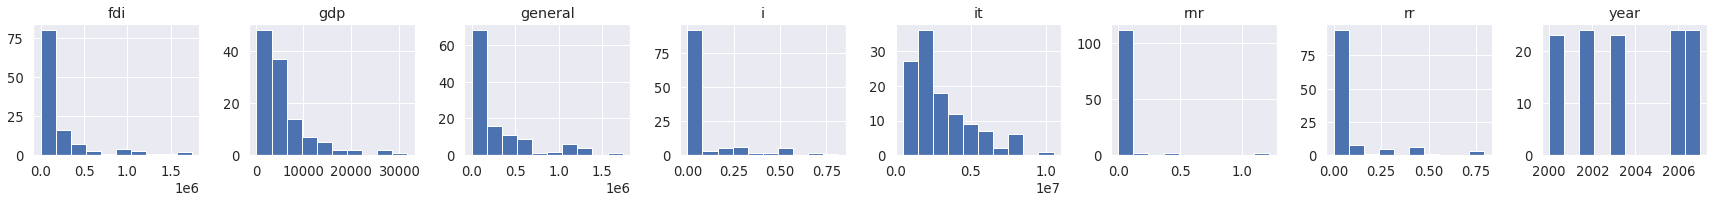

In [129]:
# %load solutions/regression_example.py

import pandas as pd
url = 'https://raw.githubusercontent.com/davidrkearney/Kearney_Data_Science/master/_notebooks/df_panel_fix.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split



df.columns

sklearn.set_config(display='diagram')

df=df.dropna()

df.isnull().sum()



X, y = df.drop(['specific', 'Unnamed: 0'], axis = 1), df['specific']


X = X.select_dtypes(include='number')
X


_ = X.hist(figsize=(30, 15), layout=(5, 8))

In [69]:
X.head()

,general,year,gdp,fdi,rnr,rr,i,it
4,32100.0,2000,2902.09,31847,0.0,0.0,0.000000,1499110
6,66529.0,2002,3519.72,38375,0.0,0.0,0.000000,2404936
7,52108.0,2003,3923.11,36720,0.0,0.0,0.000000,2815820
10,279052.0,2006,6112.50,139354,0.0,0.0,0.324324,5167300
11,178705.0,2007,7360.92,299892,0.0,0.0,0.324324,7040099


In [70]:
y.head()

4      195580.0
6      434149.0
7      619201.0
10    1457872.0
11    2213991.0
Name: specific, dtype: float64

### Insert random data for demonstration

In [71]:
import numpy as np

X = X.assign(ran_num=np.arange(0, X.shape[0]))

### Split dataset

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

## Train linear model

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

ridge = Pipeline([
    ('scale', StandardScaler()),
    ('reg', Ridge())
])
ridge.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('reg', Ridge())])

In [74]:
ridge.score(X_train, y_train)

0.8843443502191103

In [75]:
ridge.score(X_test, y_test)

0.7491370703502245

## Plot coefficients

Coefficients represent the relationship between a feature and the target assuming that all other features remain constant.

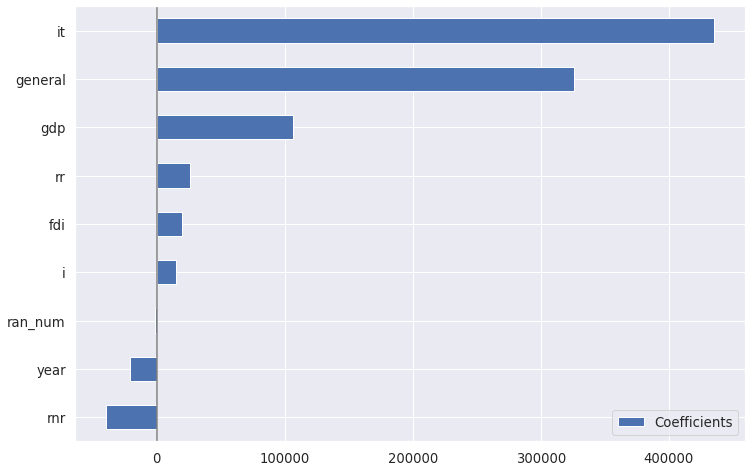

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_linear_coef(coefs, names, ax=None, sorted=False):
    if ax is None:
        fig, ax = plt.subplots()
    coefs = pd.DataFrame(
       coefs, columns=['Coefficients'],
       index=names
    )
    
    if sorted:
        coefs = coefs.sort_values(by='Coefficients')

    coefs.plot(kind='barh', ax=ax)
    ax.axvline(x=0, color='.5')
    return ax

plot_linear_coef(ridge['reg'].coef_, names=X_train.columns, sorted=True);

## Coefficient variability

In [77]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

In [78]:
ridges_cv = cross_validate(
    ridge, X_train, y_train, cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True)

In [79]:
ridges_cv

{'fit_time': array([0.00852752, 0.00879049, 0.00563025, 0.00589609, 0.00541282,
        0.00482273, 0.00472617, 0.00440693, 0.00431228, 0.00409317,
        0.00431299, 0.003896  , 0.00612736, 0.09311175, 0.00695705,
        0.00576901, 0.00550413, 0.00539637, 0.00509334, 0.00491738,
        0.00479674, 0.00459194, 0.00439835, 0.00426984, 0.00396895]),
 'score_time': array([0.00384283, 0.00219274, 0.00248122, 0.00215101, 0.00219202,
        0.00196052, 0.00188565, 0.00182557, 0.00175428, 0.00166225,
        0.0016768 , 0.00160766, 0.00199437, 0.00305367, 0.00251174,
        0.00237942, 0.00228405, 0.00211263, 0.00204182, 0.00194716,
        0.00198007, 0.00189042, 0.00182319, 0.00166941, 0.00160313]),
 'estimator': (Pipeline(steps=[('scale', StandardScaler()), ('reg', Ridge())]),
  Pipeline(steps=[('scale', StandardScaler()), ('reg', Ridge())]),
  Pipeline(steps=[('scale', StandardScaler()), ('reg', Ridge())]),
  Pipeline(steps=[('scale', StandardScaler()), ('reg', Ridge())]),
  Pipelin

In [80]:
ridge_coefs = pd.DataFrame(
   [model['reg'].coef_ for model in ridges_cv['estimator']],
   columns=X.columns
)

In [81]:
ridge_coefs.head()

,general,year,gdp,fdi,rnr,rr,i,it,ran_num
0,366170.413056,-53199.923796,29027.500401,103838.720536,-38871.206032,21826.179010,18730.354007,432388.097936,15395.947631
1,278344.791911,31229.815166,105656.219289,12157.657371,-42445.111433,33836.845100,10283.384018,490405.339232,138.790062
2,370195.639332,4058.337195,180433.806468,-20521.007552,-46413.645489,51399.811179,-20177.524103,315977.584466,-43552.653962
3,344530.343098,-33517.706292,154739.154793,-33164.713671,-22366.886793,-8720.784251,37077.197240,464446.608528,-6371.954113
4,296527.214315,-41401.308214,78119.685147,21683.387951,-41251.611341,41388.300696,26437.090097,418431.007311,11901.614954


### Plotting the variability of the cofficients

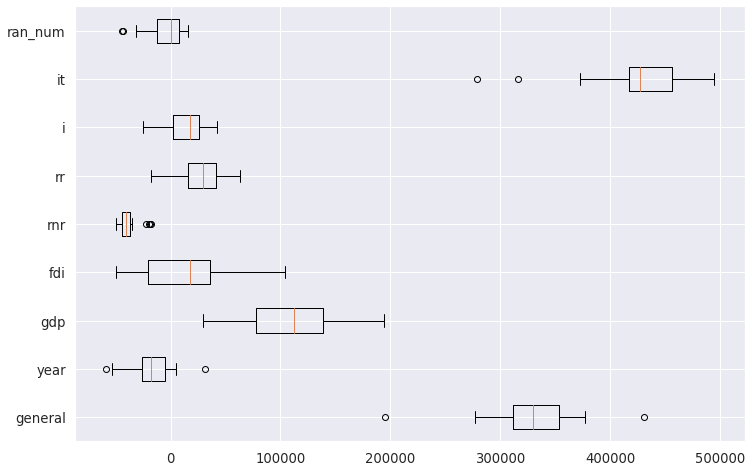

In [82]:
fig, ax = plt.subplots()
_ = ax.boxplot(ridge_coefs, vert=False, labels=ridge_coefs.columns)

In [83]:
from sklearn.linear_model import Lasso
lasso = Pipeline([
    ('scale', StandardScaler()),
    ('reg', Lasso(alpha=0.06))
])

In [84]:
lasso.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('reg', Lasso(alpha=0.06))])

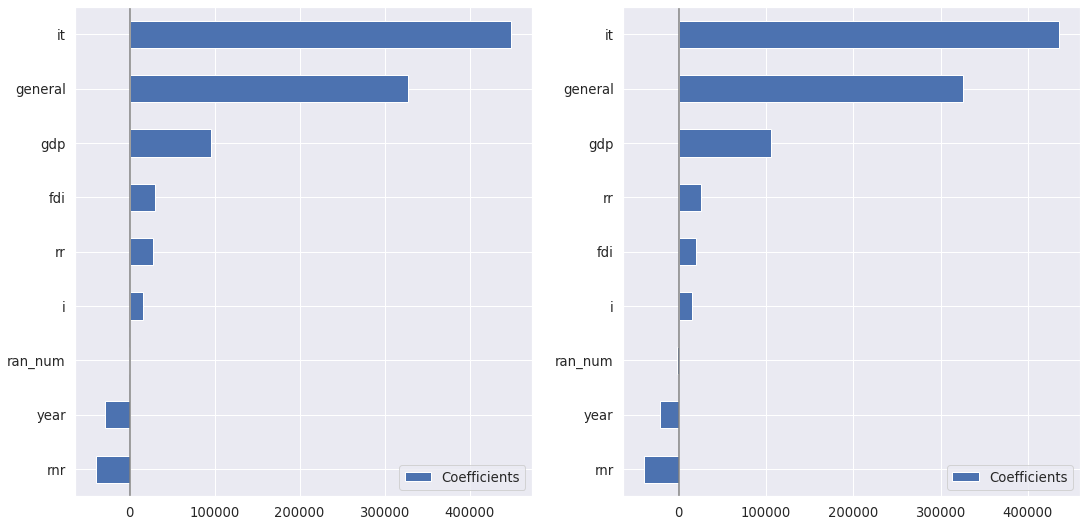

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
plot_linear_coef(lasso['reg'].coef_, names=X_train.columns, sorted=True, ax=ax1);
plot_linear_coef(ridge['reg'].coef_, names=X_train.columns, sorted=True, ax=ax2);

In [86]:
lasso_cvs = cross_validate(
    lasso, X_train, y_train, return_estimator=True, cv=RepeatedKFold(n_splits=5, n_repeats=5)
)

In [87]:
lasso_coefs = pd.DataFrame(
   [model['reg'].coef_ for model in lasso_cvs['estimator']],
   columns=X.columns
)

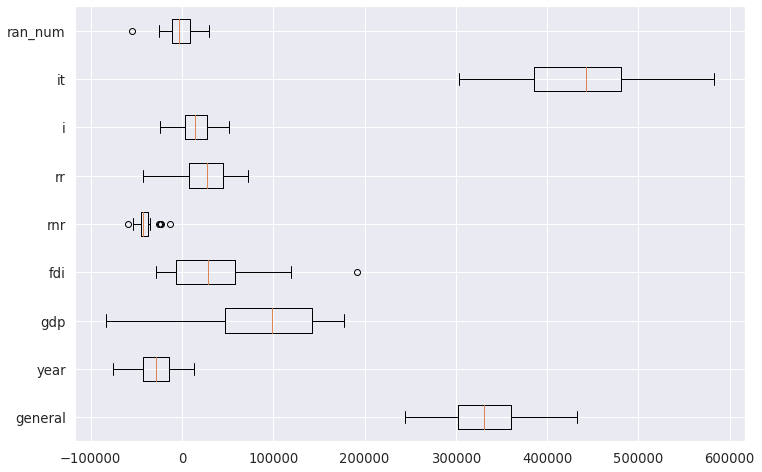

In [88]:
fig, ax = plt.subplots()
_ = ax.boxplot(lasso_coefs, vert=False, labels=ridge_coefs.columns)

<AxesSubplot:>

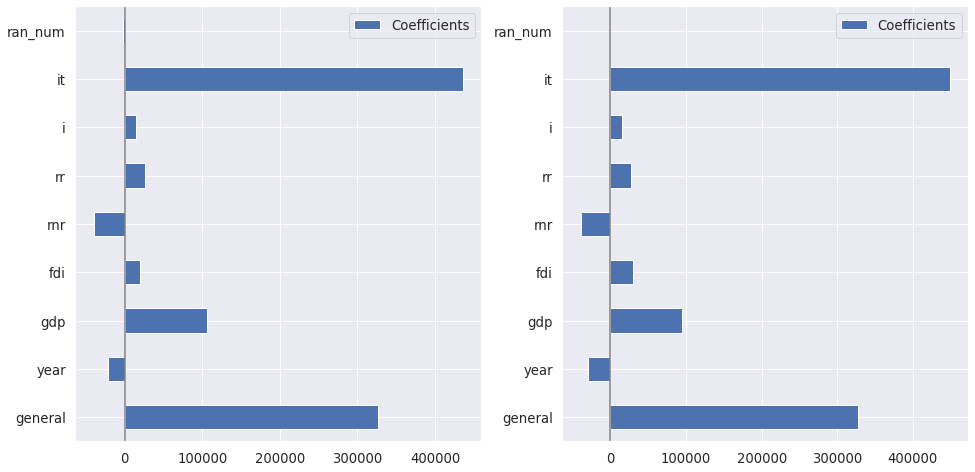

In [89]:
# %load solutions/03-ex01-solutions.py
from sklearn.linear_model import Lasso

lasso = Pipeline([
    ('scale', StandardScaler()),
    ('reg', Lasso(random_state=42, alpha=0.04))
])
lasso.fit(X_train, y_train)

lasso.score(X_test, y_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plot_linear_coef(ridge['reg'].coef_, X_train.columns, ax=ax1)
plot_linear_coef(lasso['reg'].coef_, X_train.columns, ax=ax2)

## Random Forest

In [90]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [91]:
rf.score(X_train, y_train)

0.9711219647906122

In [92]:
rf.score(X_test, y_test)

0.7873539531176165

In [93]:
def plot_importances(importances, names, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    indices = np.argsort(importances)
    ax.barh(range(len(importances)), importances[indices])
    ax.set(yticks=range(len(importances)),
           yticklabels=np.array(names)[indices]);

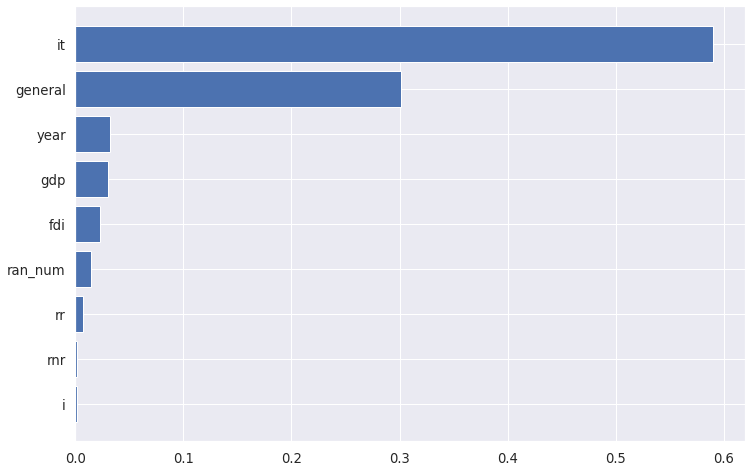

In [94]:
importances = rf.feature_importances_
plot_importances(importances, X_train.columns);

Pay attention to `ran_num`!

## Permutation Feature Importance

### Can be used on the test data!

In [95]:
from sklearn.inspection import permutation_importance

rf_perm_results = permutation_importance(rf, X_test, y_test,
                                        n_repeats=10, n_jobs=-1)

In [96]:
def plot_permutation_importance(perm_results, names, ax=None):
    perm_sorted_idx = perm_results.importances_mean.argsort()
    if ax is None:
        fig, ax = plt.subplots()
    _ = ax.boxplot(perm_results.importances[perm_sorted_idx].T, vert=False,
                   labels=np.array(names)[perm_sorted_idx])
    return ax

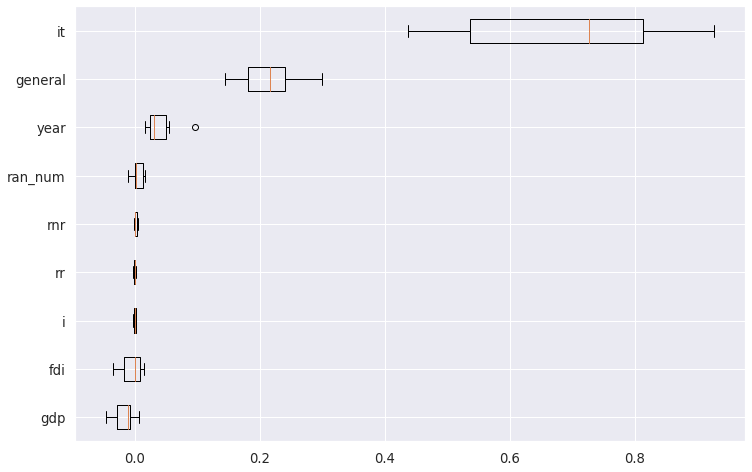

In [97]:
_ = plot_permutation_importance(rf_perm_results, X_test.columns)

### Load cancer dataset

In [134]:
# %load solutions/classifier_example.py
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/strokes_training.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

df=df.dropna()

df.isnull().sum()

df.columns

sklearn.set_config(display='diagram')

X, y = df.drop(['stroke', 'id'], axis = 1), df['stroke']


X = X.select_dtypes(include='number')
X

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7131
           1       0.00      0.00      0.00       137

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.50      7268
weighted avg       0.96      0.98      0.97      7268



In [136]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [137]:
rf.score(X_test, y_test)

0.9808750687947165

### Permutation importance with random forest

In [138]:
from sklearn.inspection import permutation_importance

rf_result = permutation_importance(rf, X_train, y_train,
                                   n_repeats=10, n_jobs=-1)

### Training data

/home/david/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


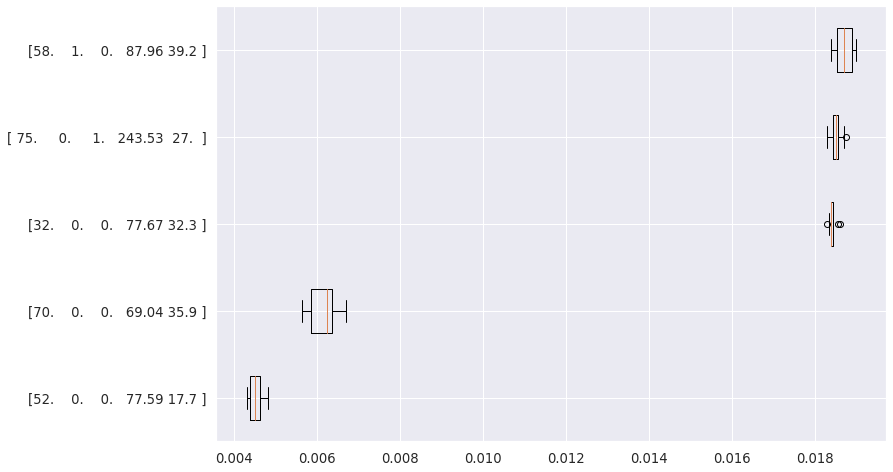

In [139]:
_ = plot_permutation_importance(rf_result, X)

In [166]:
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

corr = spearmanr(X_train).correlation
corr_linkage = hierarchy.ward(corr)
corr_linkage

array([[0.        , 1.        , 1.05218646, 2.        ],
       [2.        , 5.        , 1.20582869, 3.        ],
       [3.        , 4.        , 1.24728653, 2.        ],
       [6.        , 7.        , 1.38884045, 5.        ]])

In [167]:
from collections import defaultdict

cluster_ids = hierarchy.fcluster(corr_linkage, 1, criterion='distance')
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

selected_features

[0, 1, 2, 3, 4]

### Feature importance with selected features

In [170]:
from sklearn.inspection import permutation_importance

rf_sel_result = permutation_importance(
    rf_sel, X_test, y_test, n_repeats=10, n_jobs=-1)

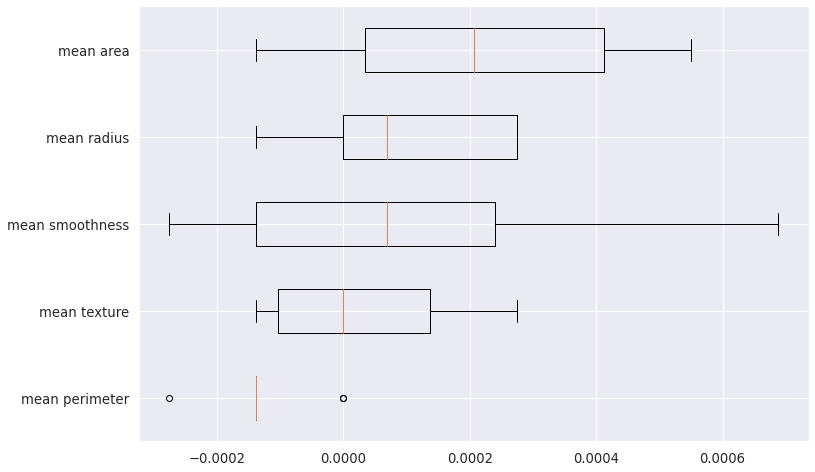

In [171]:
features_sel = data.feature_names[selected_features]
_ = plot_permutation_importance(rf_sel_result, features_sel)

## Partial Dependence

### Train a HistGradientBostingClassifer

In [172]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier 

In [174]:
hist = HistGradientBoostingClassifier(random_state=0)
hist.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

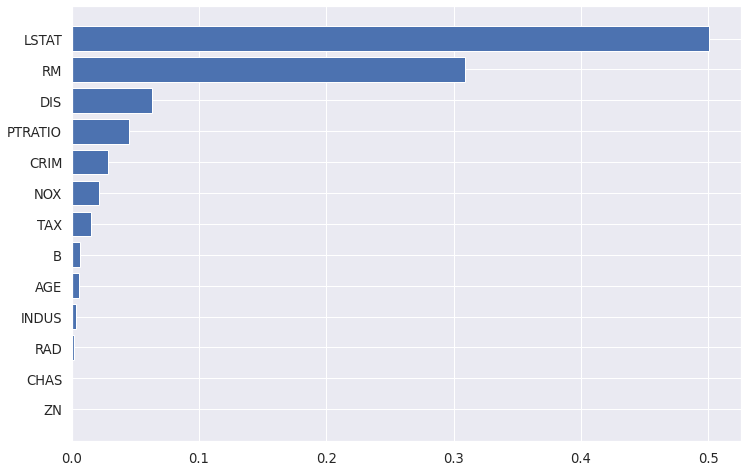

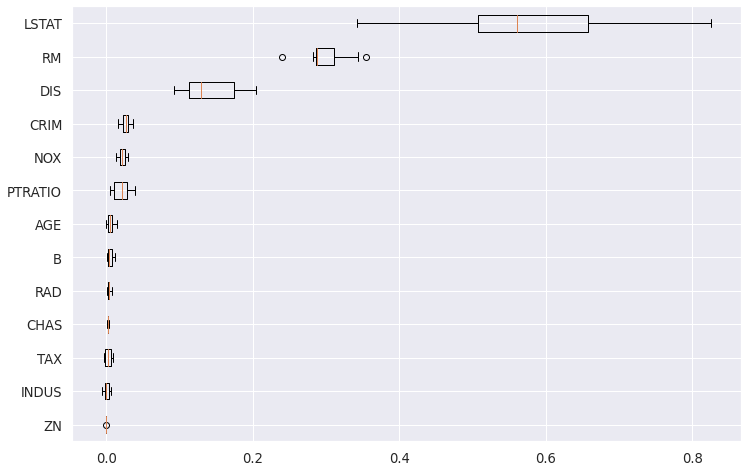

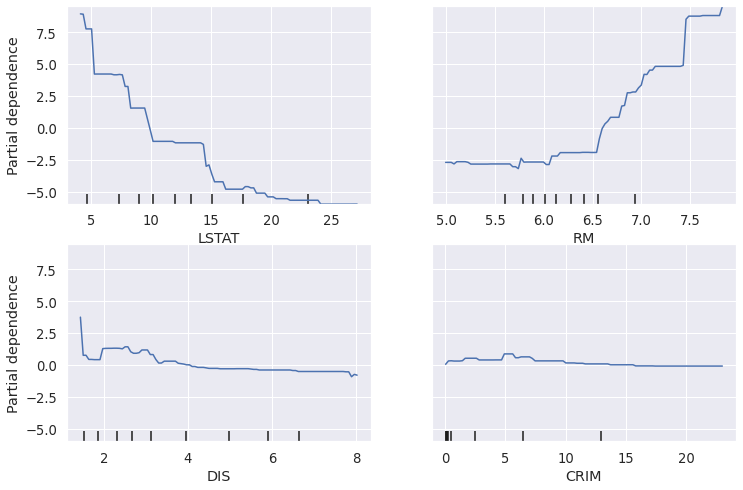

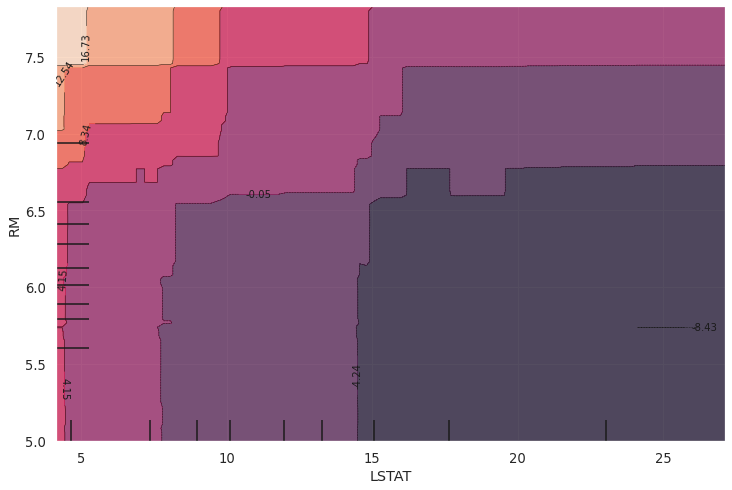

In [117]:
# %load solutions/03-ex03-solutions.py
from sklearn.datasets import load_boston

boston = load_boston()

X, y = boston.data, boston.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=0)

gb.fit(X_train, y_train)

gb.score(X_train, y_train)

plot_importances(gb.feature_importances_, boston.feature_names)

gb_perm_results = permutation_importance(gb, X_test, y_test, n_repeats=10, n_jobs=-1)

plot_permutation_importance(gb_perm_results, boston.feature_names)

plot_partial_dependence(gb, X_test, features=["LSTAT", "RM", "DIS", "CRIM"],
                        feature_names=boston.feature_names, n_cols=2)

plot_partial_dependence(gb, X_test, features=[('LSTAT', 'RM')],
                        feature_names=boston.feature_names)
